In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)

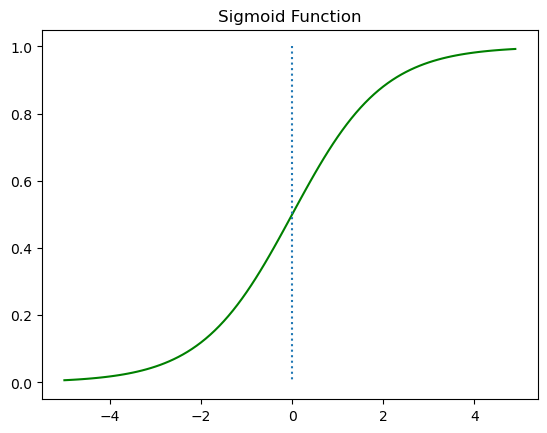

In [7]:
plt.plot(x,y, 'g')
plt.plot([0,0], [1.0, 0.0], ':')
plt.title('Sigmoid Function')
plt.show()

In [19]:
y1=sigmoid(0.5*x)
y2=sigmoid(x)
y3=sigmoid(2*x)

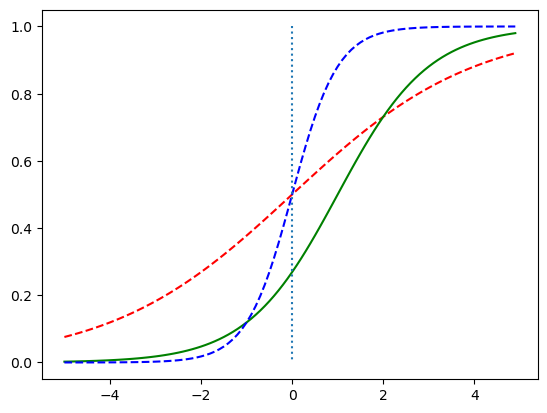

In [18]:
plt.plot(x,y1,'r', linestyle='--')
plt.plot(x,y2, 'g')
plt.plot(x,y3, 'b', linestyle='--')
plt.plot([0,0], [1.0, 0.0],':')
plt.show()

In [44]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [45]:
torch.manual_seed(1)
x_data=[[1,2],[2,3],[3,1],[4,3],[5,3],[6,2]]
t_data=[[0],[0],[0],[1],[1],[1]]
x_train=torch.FloatTensor(x_data)
y_train=torch.FloatTensor(t_data)
print(x_train.size())
print(y_train.size())

torch.Size([6, 2])
torch.Size([6, 1])


In [46]:
W=torch.zeros((2,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)

optimizer=optim.SGD([W, b], lr=0.1)
nb_epoch=1000
costs=[]

In [47]:
for epoch in range(nb_epoch):
    y=x_train.matmul(W)+b
    h=torch.sigmoid(y)

    cost=-(y_train*torch.log(h) + (1-y_train)*torch.log(1-h)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if epoch%100==0:
        print('Epoch:', epoch, 'Cost:', cost.item())

Epoch: 0 Cost: 0.6931471824645996
Epoch: 100 Cost: 0.41432666778564453
Epoch: 200 Cost: 0.34952056407928467
Epoch: 300 Cost: 0.3013016879558563
Epoch: 400 Cost: 0.26353225111961365
Epoch: 500 Cost: 0.23351818323135376
Epoch: 600 Cost: 0.20931296050548553
Epoch: 700 Cost: 0.1894957274198532
Epoch: 800 Cost: 0.17303510010242462
Epoch: 900 Cost: 0.15917940437793732


In [48]:
h2=torch.sigmoid(x_train.matmul(W)+b)
print(h2)

tensor([[0.0299],
        [0.1576],
        [0.3006],
        [0.7833],
        [0.9408],
        [0.9806]], grad_fn=<SigmoidBackward0>)


In [49]:
prediction=h2>=torch.FloatTensor([0.5])
print(prediction)

tensor([[False],
        [False],
        [False],
        [ True],
        [ True],
        [ True]])


In [50]:
print(W)
print(b)

tensor([[1.4806],
        [0.3245]], requires_grad=True)
tensor([-5.6105], requires_grad=True)


<Axes: >

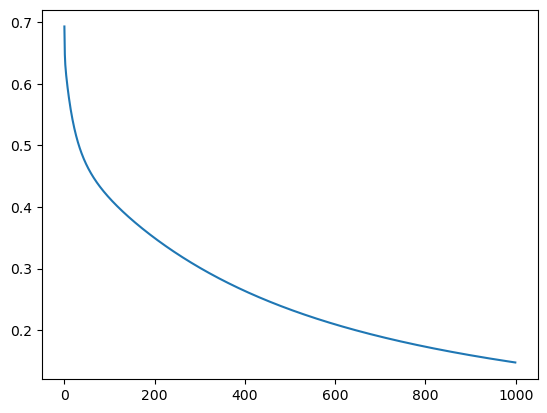

In [51]:
import pandas as pd
s1=pd.Series(costs)
s1.plot()

In [73]:
torch.manual_seed(1)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)

In [74]:
model=nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [75]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [76]:
optimizer=optim.SGD(model.parameters(), lr=0.1)
nb_epochs=1000
costs=[]
accuracy_list=[]

In [77]:
for epoch in range(nb_epoch):
    h=model(x_train)
    cost=F.binary_cross_entropy(h, y_train)
    #cost=-(y_train*torch.log(h) + (1-y_train)*torch.log(1-h)).mean()
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    costs.append(cost.item())

    if epoch%100==0:
        pred=h>=torch.FloatTensor([0.5])
        correct_pred=pred.float()==y_train
        print("correct_pred:",correct_pred)
        accuracy=correct_pred.sum().item()/len(correct_pred)
        accuracy_list.append(accuracy)
        print("epoch:",epoch, 'cost:', cost.item(), "accuracy:", accuracy)

correct_pred: tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 0 cost: 0.5397130846977234 accuracy: 0.8333333333333334
correct_pred: tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 100 cost: 0.4076883792877197 accuracy: 0.8333333333333334
correct_pred: tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 200 cost: 0.34564945101737976 accuracy: 0.8333333333333334
correct_pred: tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 300 cost: 0.29832255840301514 accuracy: 0.8333333333333334
correct_pred: tensor([[ True],
        [ True],
        [False],
        [ True],
        [ True],
        [ True]])
epoch: 400 cost: 0.26117900013923645 accuracy: 0.8333333333333334
correct_pred: tensor([[True],
        [True],
        [True],
        [True],
        [Tr

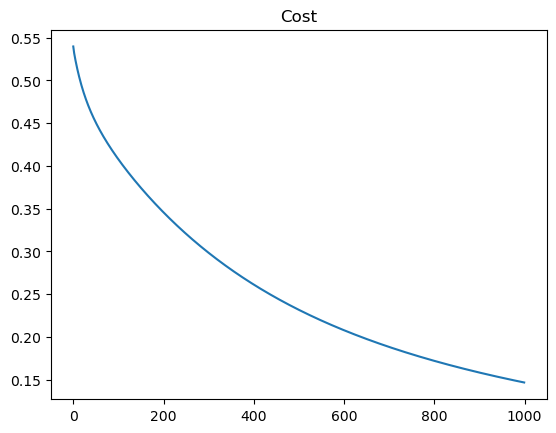

In [78]:
s1=pd.Series(costs)
plt.plot(s1)
plt.title("Cost")
plt.show()

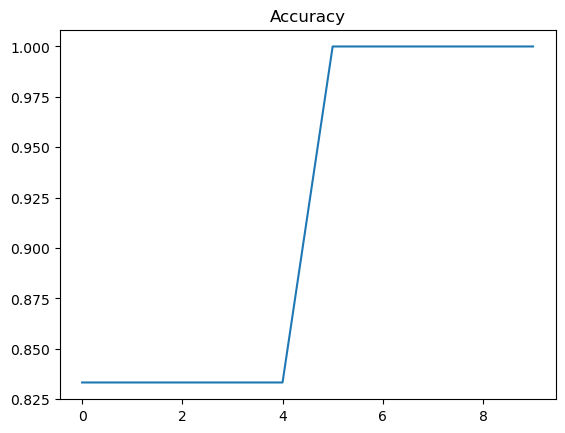

In [79]:
s2=pd.Series(accuracy_list)
plt.plot(s2)
plt.title("Accuracy")
plt.show()

In [83]:
h2=model(x_train)
pred2=h2>=torch.FloatTensor([0.5])
pred2.float()

tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])